In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning and transformation

In [3]:
import pandas as pd
solved= pd.read_csv (r'C:\Users\PROXY INFO\Desktop\python\Solved.csv')


In [4]:

unsolved= pd.read_csv (r'C:\Users\PROXY INFO\Desktop\python\unSolved.csv')

C:\Users\PROXY INFO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
solved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448172 entries, 0 to 448171
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Agency Code        448172 non-null  int64 
 1   Agency Type        448172 non-null  int64 
 2   City               448172 non-null  int64 
 3   State              448172 non-null  int64 
 4   Year               448172 non-null  int64 
 5   Month              448172 non-null  int64 
 6   Incident           448172 non-null  int64 
 7   Crime Type         448172 non-null  int64 
 8   Crime Solved       448172 non-null  object
 9   Victim Sex         448172 non-null  int64 
 10  Victim Age         448172 non-null  int64 
 11  Victim Race        448172 non-null  int64 
 12  Perpetrator Sex    448172 non-null  int64 
 13  Perpetrator Age    448172 non-null  int64 
 14  Perpetrator Race   448172 non-null  int64 
 15  Relationship       448172 non-null  int64 
 16  Weapon             4

In [18]:
solved.columns

Index(['Agency Code', 'Agency Type', 'City', 'State', 'Year', 'Month',
       'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age',
       'Victim Race', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
import numpy as np
scaler=StandardScaler()


# Linear regression

In [10]:
X=solved[['Victim Sex', 'Victim Age','Victim Race','City','Weapon','State', 'Year', 'Month','Incident', 'Crime Type']]
y=solved[['Perpetrator Age','Perpetrator Sex','Perpetrator Race']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=40)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(model.coef_)
print(model.intercept_)


print("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R_squared :", metrics.r2_score(y_test,y_pred))


[[ 5.85235389e+00  6.42491736e-02 -1.37097900e+00  5.14145234e-03
   2.24399061e-01  3.42047719e-02 -3.84561174e-02 -1.92188100e-02
  -7.33689514e-04 -2.07983637e+00]
 [-2.30168196e-02  1.03968809e-04  2.40974943e-02  4.39013829e-05
   4.93722993e-02  3.87958826e-04 -1.41758639e-03 -8.16755562e-05
  -3.62538931e-05  6.96567780e-02]
 [-1.13305999e-02  4.39582657e-04  6.57568997e-01 -1.13561815e-04
  -3.26533800e-03  1.15846240e-03  1.49184506e-04  4.38226601e-05
   2.05139649e-07 -8.92094509e-02]]
[96.9764473   3.84980409  0.24763066]
MSE : 63.130712628447924
R_squared : 0.17792952309979201


# Polynomial regression

In [29]:
X=solved[['Victim Sex', 'Victim Age','Victim Race','City','Weapon','State', 'Year', 'Month','Incident', 'Crime Type']]
y=solved[['Perpetrator Sex','Perpetrator Age','Perpetrator Race']]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=40)
model=LinearRegression()
poly=PolynomialFeatures(degree=2)
X_train_fit=poly.fit_transform(X_train)
model.fit(X_train_fit,y_train)
X_test_=poly.fit_transform(X_test)
predicted=model.predict(X_test_)

print("MSE :", metrics.mean_squared_error(y_test,predicted))
print("R_squared :", metrics.r2_score(y_test,predicted))

MSE : 57.705618892322995
R_squared : 0.21330032031807697


In [4]:
solved

,Agency Code,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,126,0,144,38,1980,1,1,0,Yes,1,14,4,1,15,4,5,2,0,0
1,126,0,144,38,1980,3,1,0,Yes,1,43,1,1,42,1,5,3,0,0
2,126,0,144,38,1980,4,1,0,Yes,1,43,1,1,42,1,5,3,0,0
3,126,0,144,38,1980,5,1,0,Yes,1,30,1,1,36,1,5,1,0,0
4,126,0,144,38,1980,5,2,0,Yes,2,42,4,1,27,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448167,1039,0,577,46,2014,8,1,0,Yes,1,29,4,1,67,2,3,1,0,0
448168,4433,1,991,46,2014,6,1,0,Yes,1,62,1,1,57,1,5,1,0,0
448169,4127,0,991,46,2014,9,1,0,Yes,2,0,3,2,22,3,1,3,0,0
448170,3309,1,1258,46,2014,12,1,0,Yes,1,55,1,1,31,1,4,2,0,1


In [49]:
X=solved[['Victim Sex', 'Victim Age','Victim Race','City','Weapon','State', 'Year', 'Month','Incident', 'Crime Type']]
y=solved[['Perpetrator Sex','Perpetrator Age','Perpetrator Race']]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=40)

In [21]:
import sklearn
print(sklearn.__version__)

0.22.1


# k-Nearest Neighbors for Multioutput Regression

In [50]:
# k-nearest neighbors for multioutput regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
# define model
modelknn = KNeighborsRegressor()
# fit model
modelknn.fit(X, y)
# make a prediction
yhat = modelknn.predict(X_test)


In [44]:
for x in range(len(yhat)):
    for y in range(3):
        yhat[x][y]=int(round(yhat[x][y]))
yhat

array([[ 1., 20.,  1.],
       [ 1., 21.,  2.],
       [ 1., 17.,  2.],
       ...,
       [ 2., 39.,  1.],
       [ 1., 31.,  2.],
       [ 1., 19.,  1.]])

In [45]:
y_test
ytest=np.array(y_test)
ytest

array([[ 1, 23,  1],
       [ 1,  0,  2],
       [ 1, 25,  2],
       ...,
       [ 1, 23,  2],
       [ 1, 29,  3],
       [ 1, 20,  1]], dtype=int64)

In [47]:
import math
def getAccuracy(test, predictions):
    correct1=0
    correct2=0
    correct3=0
    correct4=0
    
    for x in range(len(test)):
        if test[x][0]==predictions[x][0]:
            correct1+=1
        if abs(test[x][1]-predictions[x][1])<10:
            correct2+=1
        if test[x][2]==predictions[x][2]:
            correct3+=1
       
    c = [correct1,correct2,correct3]
    return correct1/len(test)*100, correct2/len(test)*100, correct3/len(test)*100

accuracy , acc2, acc3= getAccuracy(ytest, yhat)
print(accuracy,acc2,acc3)


90.00907387022879 66.13215125100407 75.43658703477821


 # Random Forest for Multioutput Regression

In [11]:

# random forest for multioutput regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define model
model = RandomForestRegressor()
# fit model
model.fit(X_train, y_train)
# make a prediction
yhat2 = model.predict(X_test)
# summarize prediction
print(yhat2[0])

[ 1.01 22.4   1.15]


In [12]:
for x in range(len(yhat2)):
    for y in range(3):
        yhat2[x][y]=int(round(yhat2[x][y]))
yhat2

array([[ 1., 22.,  1.],
       [ 1., 26.,  2.],
       [ 1., 23.,  2.],
       ...,
       [ 1., 41.,  2.],
       [ 1., 32.,  2.],
       [ 1., 24.,  1.]])

In [13]:
accuracy , acc2, acc3= getAccuracy(ytest, yhat2)
print(accuracy,acc2,acc3)

89.22738226281498 62.96075923005979 82.64659506738464


# plot tree regression multioutput


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


# Fit regression model
clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=5)
clf_3 = DecisionTreeRegressor(max_depth=8)
clf_4 = DecisionTreeRegressor(max_depth=12)
clf_5 = DecisionTreeRegressor(max_depth=20)
clf_6 = DecisionTreeRegressor(max_depth=25)
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_3.fit(X_train, y_train)
clf_4.fit(X_train, y_train)
clf_5.fit(X_train, y_train)
clf_6.fit(X_train, y_train)
# Predict
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)
y_3 = clf_3.predict(X_test)
y_4 = clf_4.predict(X_test)
y_5 = clf_5.predict(X_test)
y_6 = clf_6.predict(X_test)

In [16]:
y_1

array([[ 1.09891814, 23.61327019,  1.55182245],
       [ 1.1497581 , 31.59519937,  1.49556092],
       [ 1.09891814, 23.61327019,  1.55182245],
       ...,
       [ 1.1497581 , 31.59519937,  1.49556092],
       [ 1.1497581 , 31.59519937,  1.49556092],
       [ 1.09891814, 23.61327019,  1.55182245]])

In [17]:
for x in range(len(y_1)):
    for y in range(3):
        y_1[x][y]=int(round(y_1[x][y]))
y_1


array([[ 1., 24.,  2.],
       [ 1., 32.,  1.],
       [ 1., 24.,  2.],
       ...,
       [ 1., 32.,  1.],
       [ 1., 32.,  1.],
       [ 1., 24.,  2.]])

In [18]:
accuracy , acc2, acc3= getAccuracy(ytest, y_1)
print(accuracy,acc2,acc3)

89.08532413054473 63.665099812572514 52.36887513759557


In [20]:
for x in range(len(y_3)):
    for y in range(3):
        y_3[x][y]=int(round(y_3[x][y]))
accuracy , acc2, acc3= getAccuracy(ytest, y_3)
print(accuracy,acc2,acc3)

89.13218100139827 64.68256329396365 67.17490256745901


In [22]:
for x in range(len(y_4)):
    for y in range(3):
        y_4[x][y]=int(round(y_4[x][y]))
accuracy , acc2, acc3= getAccuracy(ytest, y_4)
print(accuracy,acc2,acc3)

89.09424924880256 64.01615446404665 72.94127272186356


In [30]:
for x in range(len(y_5)):
    for y in range(3):
        y_5[x][y]=int(round(y_5[x][y]))
accuracy , acc2, acc3= getAccuracy(ytest, y_5)
print(accuracy,acc2,acc3)

86.71273019367507 57.39446047660132 74.38937315919436


In [34]:
for x in range(len(y_6)):
    for y in range(3):
        y_6[x][y]=int(round(y_6[x][y]))
accuracy , acc2, acc3= getAccuracy(ytest, y_6)
print(accuracy,acc2,acc3)

84.24419123553388 52.740755065004606 72.7575640377235


# Separate Model for Each Output (MultiOutputRegressor)

In [36]:

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define model
model = LinearSVR()
wrapper = MultiOutputRegressor(model)
# fit model
wrapper.fit(X_train, y_train)
# make a prediction
yhat3= wrapper.predict(X_test)
# summarize prediction
print(yhat3)

C:\Users\PROXY INFO\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PROXY INFO\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PROXY INFO\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[ 0.97856982 17.89344308  1.31363975]
 [ 1.0441717  12.8619432   2.00713663]
 [ 1.02573153 11.22274889  1.98850542]
 ...
 [ 1.05366199 14.91234141  2.00906103]
 [ 1.02276728 13.84619816  2.01174754]
 [ 1.00403796 12.03220069  1.32183881]]


In [37]:
for x in range(len(yhat3)):
    for y in range(3):
        yhat3[x][y]=int(round(yhat3[x][y]))
accuracy , acc2, acc3= getAccuracy(ytest, yhat3)
print(accuracy,acc2,acc3)

89.08606789039955 34.66069675423199 84.59301460744355


# Chained Models for Each Output (RegressorChain)

In [39]:

from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

# define model
model = LinearSVR()
wrapper = RegressorChain(model)
# fit model
wrapper.fit(X_train, y_train)
# make a prediction
yhat4= wrapper.predict(X_test)
# summarize prediction
print(yhat4[0])

C:\Users\PROXY INFO\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PROXY INFO\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[ 0.95381235 21.51748813  1.25699793]


C:\Users\PROXY INFO\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
for x in range(len(yhat4)):
    for y in range(3):
        yhat4[x][y]=int(round(yhat4[x][y]))
accuracy , acc2, acc3= getAccuracy(ytest, yhat4)
print(accuracy,acc2,acc3)

89.08532413054473 47.61253086603398 85.15678457739565


In [52]:
X_pred=unsolved[['Victim Sex', 'Victim Age','Victim Race','City','Weapon','State', 'Year', 'Month','Incident', 'Crime Type']]
y_pred=modelknn.predict(X_pred)

In [53]:
y_pred

array([[ 1.4, 28.2,  2.4],
       [ 1.6, 33.2,  2. ],
       [ 1.4, 28.6,  2. ],
       ...,
       [ 1.2, 43.8,  1.2],
       [ 1.2, 36.6,  1. ],
       [ 1. , 34.2,  1. ]])

In [54]:
for x in range(len(y_pred)):
    for y in range(3):
        y_pred[x][y]=int(round(y_pred[x][y]))
y_pred

array([[ 1., 28.,  2.],
       [ 2., 33.,  2.],
       [ 1., 29.,  2.],
       ...,
       [ 1., 44.,  1.],
       [ 1., 37.,  1.],
       [ 1., 34.,  1.]])

In [58]:
df_pred=pd.DataFrame(y_pred)
df_pred

,0,1,2
0,1.0,28.0,2.0
1,2.0,33.0,2.0
2,1.0,29.0,2.0
3,1.0,34.0,2.0
4,1.0,38.0,2.0
...,...,...,...
190277,1.0,21.0,2.0
190278,1.0,36.0,1.0
190279,1.0,44.0,1.0
190280,1.0,37.0,1.0


In [67]:
race={"White":1,"Black":2,"Asian/Pacific Islander":3,"Native American/Alaska Native":4,"Unknown":0}
sex={"Unknown":0,"Male":1,"Female":2}
inv_map = {v: k for k, v in sex.items()}
inv_map2 = {v: k for k, v in race.items()}
df_pred.replace({0:inv_map}, inplace=True)
df_pred.replace({2:inv_map2}, inplace=True)
df_pred

,0,1,2
0,Male,28.0,Black
1,Female,33.0,Black
2,Male,29.0,Black
3,Male,34.0,Black
4,Male,38.0,Black
...,...,...,...
190277,Male,21.0,Black
190278,Male,36.0,White
190279,Male,44.0,White
190280,Male,37.0,White


In [69]:
df_pred[2].value_counts()


Black                            110721
White                             79137
Asian/Pacific Islander              313
Unknown                              85
Native American/Alaska Native        26
Name: 2, dtype: int64

## Conclusion

we noticed that all models gave us a good accuracy, we choose to work with KNN model.

# 2nd part

In [5]:
result = pd.concat([solved, unsolved])
result

,Agency Code,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,126,0,144,38,1980,1,1,0,Yes,1,14,4,1,15,4,5,2,0,0
1,126,0,144,38,1980,3,1,0,Yes,1,43,1,1,42,1,5,3,0,0
2,126,0,144,38,1980,4,1,0,Yes,1,43,1,1,42,1,5,3,0,0
3,126,0,144,38,1980,5,1,0,Yes,1,30,1,1,36,1,5,1,0,0
4,126,0,144,38,1980,5,2,0,Yes,2,42,4,1,27,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190277,7224,0,557,35,2014,5,1,0,No,2,11,1,0,0,0,0,0,0,0
190278,4760,3,569,35,2014,7,1,0,No,1,52,1,0,0,0,0,5,0,1
190279,8116,3,357,35,2014,1,1,0,No,1,48,1,0,30,0,5,2,0,2
190280,8116,3,357,35,2014,1,2,0,No,2,55,1,0,50,0,5,2,0,2


In [7]:
x=pd.DataFrame(result['Year'].value_counts())


In [8]:
x01=x.reset_index( level=None, drop=False, inplace=False, col_level=0, col_fill='')
x01

,index,Year
0,1993,24335
1,1992,23793
2,1994,23246
3,1980,23092
4,1991,22657
5,1990,21246
6,1981,21208
7,1995,21179
8,1982,20544
9,1986,20125


In [9]:
x=x01['index'].values[:,np.newaxis]
x

array([[1993],
       [1992],
       [1994],
       [1980],
       [1991],
       [1990],
       [1981],
       [1995],
       [1982],
       [1986],
       [1989],
       [1983],
       [1996],
       [1987],
       [1988],
       [1985],
       [1984],
       [1997],
       [2007],
       [2006],
       [2005],
       [2003],
       [2002],
       [2004],
       [1998],
       [2009],
       [2001],
       [2008],
       [2010],
       [2012],
       [2011],
       [2000],
       [1999],
       [2013],
       [2014]], dtype=int64)

In [183]:
y=x01['Year']
y

0     24335
1     23793
2     23246
3     23092
4     22657
5     21246
6     21208
7     21179
8     20544
9     20125
10    19868
11    19653
12    18969
13    18783
14    18779
15    18386
16    18093
17    17794
18    17303
19    17275
20    16836
21    16512
22    16268
23    16233
24    16061
25    15840
26    15803
27    15595
28    15121
29    15033
30    14756
31    14671
32    14621
33    14445
34    14331
Name: Year, dtype: int64

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=5)
regression=LinearRegression()
regression.fit(x_train,y_train)
predict=regression.predict(x_test)
print("MSE", metrics.mean_squared_error(y_test,predict))
print("R",metrics.r2_score(y_test,predict))

MSE 5112531.445950168
R 0.4878058531650199


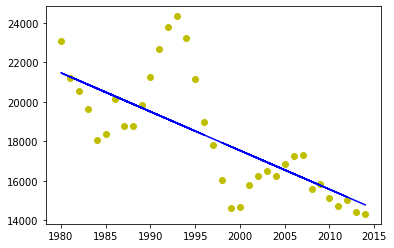

In [186]:
plt.scatter(x,y, color='y')
plt.plot(x,regression.predict(x),color='b')
plt.show()

In [10]:
x_future=np.array([[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2023],[2024],[2025]])
x_future


array([[2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2023],
       [2024],
       [2025]])

In [202]:
predict=regression.predict(x_future)
predict

array([14396.29188358, 14199.75094652, 14003.21000947, 13806.66907241,
       13610.12813535, 13413.5871983 , 13217.04626124, 13020.50532418,
       13020.50532418, 12823.96438713, 12627.42345007])

# PART 2-2

In [11]:
city={}
i=0
for s in result["City"].value_counts().keys():
    city[s]=i
    i+=1
city

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 92: 91,
 91: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [244]:
essai5=[]
for x in city:
    bla=result.loc[result['City']==x]
    essai5.append(bla['Year'].value_counts())
print(len(essai5)) 


C:\Users\PROXY INFO\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


1782


In [138]:
def der_city(tab):
    der=[]
    for i in range(len(tab)):
        intder=[]
        intder.append(tab.index[i])
        der.append(intder)
    
    return der



In [15]:
x_future

array([[2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2023],
       [2024],
       [2025]])

In [143]:
def pred_city(i):
    bla=np.array(i)
    bla2=bla.reshape(-1, 1)
    regression=LinearRegression()
    der = der_city(i)
    regression.fit(der,bla2)
    predict=regression.predict(x_future)
    for a in range(len(predict)):
        predict[a] = predict[a].round()
        if predict[a]<0:
            predict[a]=0
    return predict

In [147]:
pred_city(essai5[0])

array([[629.],
       [595.],
       [561.],
       [527.],
       [494.],
       [460.],
       [426.],
       [392.],
       [392.],
       [358.],
       [324.]])

In [ ]:
à la find e la prediction, sol va contenir les prediction par cité

In [150]:
sol=[]
for h in range(len(essai5)):
    try:
        sol.append(pred_city(essai5[h]))
    except:
        sol.append(h)
        print(h)


In [236]:
df = pd.DataFrame(x_future)
df2 = pd.DataFrame(data=sol[0])


In [237]:
for l in range(1,len(sol)):
    df2=pd.concat([df2,pd.DataFrame(data=sol[l])],axis=1, sort=False)
df2


,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,629.0,143.0,475.0,345.0,329.0,341.0,187.0,215.0,262.0,120.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,595.0,93.0,467.0,333.0,322.0,339.0,180.0,212.0,261.0,112.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,561.0,42.0,458.0,321.0,315.0,338.0,172.0,209.0,261.0,103.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,527.0,0.0,449.0,309.0,308.0,336.0,165.0,206.0,261.0,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,494.0,0.0,441.0,297.0,301.0,335.0,158.0,203.0,260.0,87.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,460.0,0.0,432.0,286.0,293.0,334.0,151.0,200.0,260.0,78.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,426.0,0.0,423.0,274.0,286.0,332.0,143.0,197.0,260.0,70.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,392.0,0.0,415.0,262.0,279.0,331.0,136.0,194.0,260.0,62.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,392.0,0.0,415.0,262.0,279.0,331.0,136.0,194.0,260.0,62.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,358.0,0.0,406.0,250.0,272.0,330.0,129.0,191.0,259.0,53.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [241]:
df3=pd.concat([df,df2],axis=1, sort=False)
df3
#ajout d'année dans la premiere colonne

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2016,629.0,143.0,475.0,345.0,329.0,341.0,187.0,215.0,262.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2017,595.0,93.0,467.0,333.0,322.0,339.0,180.0,212.0,261.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2018,561.0,42.0,458.0,321.0,315.0,338.0,172.0,209.0,261.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2019,527.0,0.0,449.0,309.0,308.0,336.0,165.0,206.0,261.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2020,494.0,0.0,441.0,297.0,301.0,335.0,158.0,203.0,260.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2021,460.0,0.0,432.0,286.0,293.0,334.0,151.0,200.0,260.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,2022,426.0,0.0,423.0,274.0,286.0,332.0,143.0,197.0,260.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,2023,392.0,0.0,415.0,262.0,279.0,331.0,136.0,194.0,260.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,2023,392.0,0.0,415.0,262.0,279.0,331.0,136.0,194.0,260.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,2024,358.0,0.0,406.0,250.0,272.0,330.0,129.0,191.0,259.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [226]:
#df4 = df3.iloc[:,2:]

In [202]:
city02=pd.DataFrame(city.keys())
city02

,0
0,Los Angeles
1,New York
2,Cook
3,Wayne
4,Harris
...,...
1777,Moultrie
1778,Rawlins
1779,Tripp
1780,Bronx


In [243]:
city3=city02.transpose()
city3

,0,1,2,3,4,5,6,7,8,9,...,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781
0,Los Angeles,New York,Cook,Wayne,Harris,Philadelphia,Dallas,Jefferson,Baltimore city,Dade,...,Sully,Palo Alto,Powder River,Gosper,Greeley,Moultrie,Rawlins,Tripp,Bronx,Divide


In [195]:
df01= pd.read_csv (r'C:\Users\PROXY INFO\Downloads\database.csv')


C:\Users\PROXY INFO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [197]:
city={}
i=0
for s in df01["City"].value_counts().keys():
    city[s]=i
    i+=1

In [252]:

inv_map = {v: k for k, v in city.items()}

In [270]:
dicosfih = {}
years = []
for i in range(len(sol)):
    predcity = []
    for j in range(len(sol[i])):
        predcity.append(sol[i][j][0])
    
    dicosfih[inv_map[i]] = predcity

for y in range(2015,2026):
    years.append(y)


In [271]:
solution = pd.DataFrame(dicosfih,
                  index=years)

In [272]:
solution

,Los Angeles,New York,Cook,Wayne,Harris,Philadelphia,Dallas,Jefferson,Baltimore city,Dade,...,Sully,Palo Alto,Powder River,Gosper,Greeley,Moultrie,Rawlins,Tripp,Bronx,Divide
2015,629.0,143.0,475.0,345.0,329.0,341.0,187.0,215.0,262.0,120.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016,595.0,93.0,467.0,333.0,322.0,339.0,180.0,212.0,261.0,112.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017,561.0,42.0,458.0,321.0,315.0,338.0,172.0,209.0,261.0,103.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018,527.0,0.0,449.0,309.0,308.0,336.0,165.0,206.0,261.0,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2019,494.0,0.0,441.0,297.0,301.0,335.0,158.0,203.0,260.0,87.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020,460.0,0.0,432.0,286.0,293.0,334.0,151.0,200.0,260.0,78.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021,426.0,0.0,423.0,274.0,286.0,332.0,143.0,197.0,260.0,70.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022,392.0,0.0,415.0,262.0,279.0,331.0,136.0,194.0,260.0,62.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023,392.0,0.0,415.0,262.0,279.0,331.0,136.0,194.0,260.0,62.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024,358.0,0.0,406.0,250.0,272.0,330.0,129.0,191.0,259.0,53.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
